

## Gradient Descent Animation: 2. Multiple Linear Regression


In [2]:
# import libraries
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera

# define (Multi-)linear regression model:
class LinearRegression(object): 
    def __init__(self,x,y, lr=0.01):
        self.lr=lr
        self.w=np.ones((1, x.shape[1])).T*3 #set starting weights to 3.
        self.b=np.ones((1, y.shape[1]))*(-1)# set starting bias to -1.
        
    def cost(self,x,y):     
        pred = x@self.w+self.b # predicted y-values
        e=y-pred    # error term
        return np.mean(e**2)  # mean squared error

    def step(self, x,y): # update parameters
        pred = x@self.w+self.b
        e=y-pred
        # update weight matrix:
        self.w = (self.w.T-self.lr*(np.mean(e*(-2*x), axis=0))).T 
        # update bias: 
        self.b = self.b - self.lr*(np.mean(e*(-2),axis=0)) 
        
    def fit(self, x,y, numberOfEpochs=1000000):
        # create arrays to store weights, biases, costs and ys-values in:
        self.AllWeights= np.zeros((numberOfEpochs, x.shape[1])) 
        self.AllBiases= np.zeros(numberOfEpochs)
        self.AllCosts= np.zeros(numberOfEpochs)
        self.All_ys= np.zeros((numberOfEpochs,2))
        
        for step in range(numberOfEpochs): 
            # for each step of gradient descent assign ...
            # ... new parameter value to respective array element:
            self.AllWeights[step]=self.w.T   
            self.AllBiases[step]=self.b
            self.AllCosts[step]=self.cost(x,y)
            self.All_ys[step]=self.predict(xs).T.flatten()
            
            self.step(x,y) # update parameters

    def predict(self, x):
        return (x @ self.w + self.b) # return predicted values    

In [3]:
x_train = np.array([ # two independent variables
    [1,-2],
    [2,1],
    [4,1],
    [5,-3],
    [6,4],
    [7,5]
])

y_train = np.array([ 
    [14],
    [-12],
    [-31],
    [-21],
    [-51],
    [-37]
])


xs= np.array([    # set pairs of x-values for regression line plot               
            [-3,-3],
             [8,8]
             ])


model=LinearRegression(x_train,y_train, lr=0.001) # set learning rate
model.fit(x_train,y_train, numberOfEpochs=100000) # set number of epochs

# Stored parameter values:
w0=model.AllWeights.T[0]
w1=model.AllWeights.T[1]
b= model.AllBiases
c=model.AllCosts
ys=model.All_ys

print("Final weights: "+ str(model.w))
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train,y_train)))

Final weights: [[-6.75922888]
 [-2.07075472]]
Final bias: [[7.23420837]]
Final costs: 75.63518594476348


In [4]:
# cross-check results with sklearn's linear regression model:
import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[-6.75922888 -2.07075472]]
[7.23420837]


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


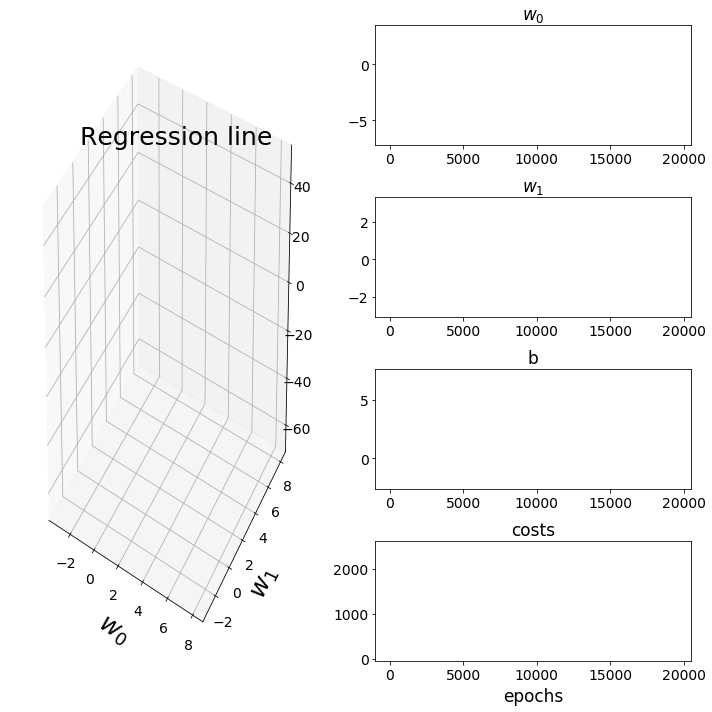

In [5]:
# Define which epochs/data points to plot:
a1 = np.arange(0,50,1).tolist()
a2=np.arange(50,100,5).tolist()
a3=np.arange(100,1000,50).tolist()
a4=np.arange(1000,20000,500).tolist()
p = a1+a2+a3+a4
p=np.array(p) 

# Create first animation (regression plot & parameter values): 
fig = plt.figure(figsize=(10,10)) # create figure
fig.suptitle('Regression line', fontsize=25,x=0.25, y=0.82)
labelsize_=14 # set tick label font size 
ax0=fig.add_subplot(1, 2, 1, projection='3d') # add supblots
ax1=fig.add_subplot(4, 2, 2) 
ax2=fig.add_subplot(4, 2, 4, sharex=ax1) # plots of parameter values share x-axis
ax3=fig.add_subplot(4, 2, 6, sharex=ax1)
ax4=fig.add_subplot(4, 2, 8, sharex=ax1) 

ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
ax0.set_xlabel(r'$w_0$', fontsize=25, labelpad=10)
ax0.set_ylabel(r'$w_1$', fontsize=25, labelpad=10)
ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
ax1.set_title(r'$w_0$', fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=labelsize_)
ax2.set_title(r'$w_1$', fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=labelsize_)
ax3.set_title("b", fontsize=17)
ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
ax4.set_title("costs", fontsize=17)
ax4.tick_params(axis='both', which='major', labelsize=labelsize_)
ax4.set_xlabel("epochs", fontsize=17, labelpad=5)

camera = Camera(fig) # create camera

for i in p:
    leg=ax0.plot(xs.T[0].flatten(),xs.T[1].flatten(),ys[i].flatten()
                 , color='r', label=str(i)) # plot regression line
    ax0.scatter(x_train.T[0],x_train.T[1], y_train.flatten()
                , color='b',marker='x', s=44) # plot data points
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)  
    ax1.plot(np.array(w0[0:i]).flatten(), color='darkblue',
             linestyle="dashed", alpha=0.5) # plot values of w0
    ax2.plot(w1[0:i].flatten(), color='blueviolet',
             linestyle="dashed", alpha=0.5) # plot values of w1
    ax3.plot(np.array(b[0:i]).flatten(), color='red',
             linestyle="dashed", alpha=0.5) # plot values of b
    ax4.plot((np.array(c[0:i]).flatten()),color='black',
             linestyle="dashed") # plot values of costs
    plt.tight_layout()
    camera.snap()  # take snapshot after each frame/iteration
    
animation = camera.animate(interval = 5,
                          repeat = True, repeat_delay = 0)  # create animation 
animation.save('MultiLinReg_1.gif', writer = 'imagemagick')  # save animation 

In [6]:
# Print final parameters and costs portrayed in animations 
print("w0: " + str(w0[i])) 
print("w1: " + str(w1[i])) 
print("y-intercept: " + str(b[i])) 
print("costs: " + str(c[i]))

w0: -6.753784163198132
w1: -2.0728519786367015
y-intercept: 7.209904544826773
final costs: 75.6352814315814


## Fixed-intercept model:
With costs being the z-value, we can only plot two out of three parameters we fitted to our data. We are generally more interested in the weights rather than the bias term of our multiple linear regression model. 
To visualize how the costs steadily reduce with our fitted weights we have to set up a new linear regression model where the bias term "b" is fixed. This can easily be done by setting our starting value for b to our chosen value b_fixed and inactivating/deleting the 'updating' term regarding "self.b". 

In [7]:
# set b to the y-intercept value we previously observed. 
b_fixed= float(model.b) 
print(b_fixed)

7.234208367512638


In [8]:
# Define new model with fixed intercept:
class LinearRegression_fixed_b(object):  
    def __init__(self,x,y,b,lr=0.01):
        self.lr=lr
        self.b=np.array([[b]]) # set fixed(!) starting value for b
        self.w=np.ones((1, x.shape[1])).T   *3   # set starting weights to 3.
          
    def cost(self,x,y):     
        pred = x@self.w+self.b # predicted y-values
        e=y-pred    # error term
        return np.mean(e**2)  # mean squared error

    def step(self, x,y):
        pred = x@self.w+self.b
        e=y-pred
        self.w = (self.w.T-self.lr*(np.mean(e*(-2*x), axis=0))).T # update weights
        
        
    def fit(self, x,y, numberOfEpochs=1000000):
        self.AllWeights= np.zeros((numberOfEpochs, x.shape[1]))
        self.AllBiases= np.zeros(numberOfEpochs)
        self.AllCosts= np.zeros(numberOfEpochs)
        self.All_ys= np.zeros((numberOfEpochs,2))
        
        for step in range(numberOfEpochs):
            self.AllWeights[step]=self.w.T
            self.AllCosts[step]=self.cost(x,y)
            
            self.step(x,y)

    def predict(self, x):
        return (x @ self.w + self.b) # return predicted values

        
model=LinearRegression_fixed_b(x_train,y_train,b_fixed, lr=0.001) 
model.fit(x_train,y_train, numberOfEpochs=100000)
    
w0=model.AllWeights.T[0]
w1=model.AllWeights.T[1]
c=model.AllCosts


print("Final weights (fixed-intercept model): "+ str(model.w))
print("Final bias (fixed-intercept model): "+ str(model.b))
print("Final costs (fixed-intercept model): " + str(model.cost(x_train,y_train)))

Final weights: [[-6.75922888]
 [-2.07075472]]
Final bias: [[7.23420837]]
Final costs: 75.63518594476345


In [9]:
def cost_3d(x,y,w,b):   # predicts costs for every pair of w0 and w1.
        pred = x@w.T+b              
        e=y-pred
        return np.mean(e**2)
        

m1s = np.linspace(-15, 5, 100) # set range of values for w0 and w1
m2s = np.linspace(-15, 5, 100)
M1, M2 = np.meshgrid(m1s, m2s)
zs = np.array([cost_3d(x_train,y_train  # determine costs for each pair of w0/w1 and fixed b. 
                       ,np.array([[mp1,mp2]]), np.array([[b_fixed]]))  
               for mp1, mp2 in zip(np.ravel(M1), np.ravel(M2))])
Z = zs.reshape(M1.shape) # get z-values for surface plot in shape of M.

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


w0: -6.759228876127614
w1: -2.0707547169812446
costs: 75.63518594476345


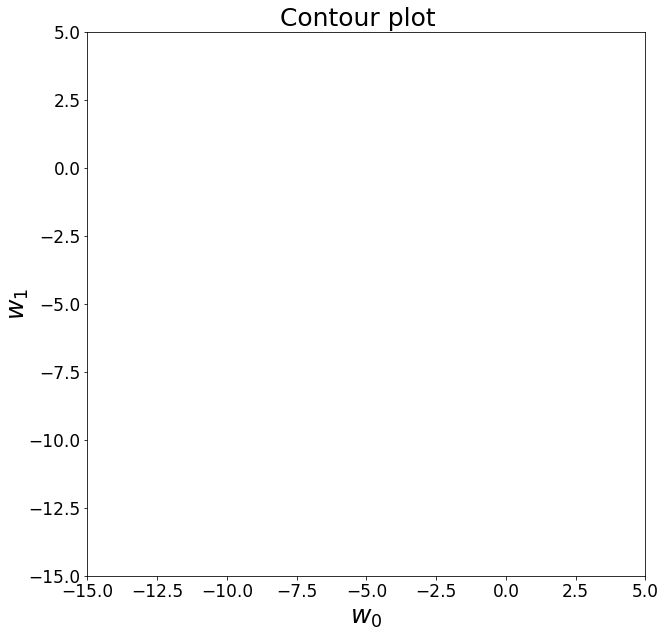

In [10]:
# Second Animation (Contour plot):
a1 = np.arange(0,50,1).tolist()
a2=np.arange(50,100,5).tolist()
a3=np.arange(100,1000,50).tolist()
a4=np.arange(1000,5000,250).tolist()  # reduce maximum number of epochs to 5000
p = a1+a2+a3+a4
p=np.array(p)

fig = plt.figure(figsize=(10,10))
levels = np.array([80,150,300,600,2000])  # set levels for contour plot
fig.suptitle('Contour plot', fontsize=25, y=0.915)
plt.tick_params(axis='both', which='major', labelsize=17) 
plt.xlabel(r'$w_0$', fontdict=None, labelpad=5, fontsize=25)
plt.ylabel(r'$w_1$', fontdict=None, labelpad=-3, fontsize=25)

camera = Camera(fig)
for i in p:
    cp = plt.contour(M1, M2, Z,levels, colors='black', # contour plot
                     linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1,fmt='%1.1f', fontsize=15 )
    cp = plt.contourf(M1, M2, Z, alpha=0.85) # filled contour plots
    plt.scatter(w0[i],w1[i],marker='o', s=10**2, color='orange' )
    plt.plot(w0[0:i],w1[0:i], linestyle="dashed", color='orange' )
    plt.legend([f'epochs: {i}'], loc='lower left', fontsize=17)
    camera.snap()
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 0)
animation.save('MultiLinReg_2.gif', writer = 'imagemagick') 

# Print final parameters and costs portrayed in (second) animation:
print("w0: " + str(w0[i])) 
print("w1: " + str(w1[i])) 
print("costs: " + str(c[i]))

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


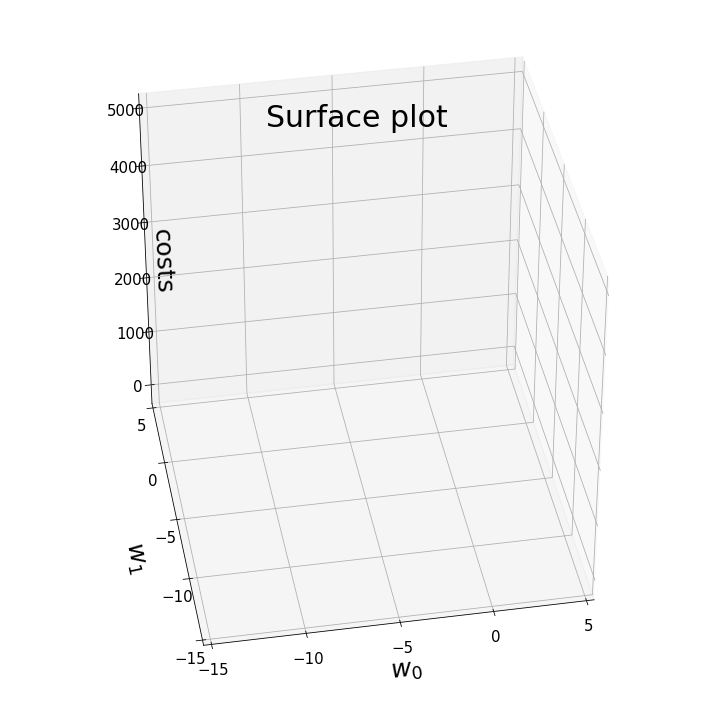

In [15]:
# Third animation (surface plot):
fig = plt.figure(figsize=(10,10))
fig.suptitle('Surface plot', fontsize=30, y=0.85)
ax = fig.add_subplot(111, projection='3d') # projection='3d'
ax.view_init(elev=37., azim=-100)
ax.set_xlim([-15, 5])
ax.set_ylim([-15, 5])
ax.set_xticks((-15,-10,-5,0,5)) 
ax.set_yticks((-15,-10,-5,0,5)) 
ax.set_xlabel(r'$w_0$', fontsize=25, labelpad=10)
ax.set_ylabel(r'$w_1$', fontsize=25, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.set_zlabel("costs", fontsize=25, labelpad=-35)

camera = Camera(fig)
for i in p:
    leg=ax.plot(w0[0:i],w1[0:i],c[0:i], linestyle="dashed",
                color="black", label=str(i)) # plot trajectory on surface
    ax.plot_surface(M1, M2, Z, cmap='terrain',rstride=1, #surface plot
                    cstride=1, antialiased=True, alpha=0.69)
    ax.scatter(w0[i],w1[i],c[i],marker='o', s=12**2,
               color="black", alpha=1.0 )
    #ax.plot(w0[0:i],w1[0:i],np.zeros(np.max(p))[0:i],
            #color="grey", linestyle="dashed") # plot trajectory in x-y plane
    ax.legend(leg,[f'epochs: {i}'], loc='lower left',
              fontsize=17)
    plt.tight_layout()  
    camera.snap()
    
animation = camera.animate(interval = 5,
                          repeat = False,
                          repeat_delay = 0)
animation.save('MultiLinReg_3.gif', writer = 'imagemagick') 